## Анализ данных платёжеспособности клиентов банка

Выполнила Петухова Мария

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

**Введите ниже Ваш путь к файлу и имя файла с данными**

In [2]:
my_path_to_data=Path('data/')
file_name='data.csv'
data = pd.read_csv(my_path_to_data.joinpath(file_name))

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


#### Анализ и замена пропусков и неверных значений

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Неполные данные в колонках days_employed и total_income

In [5]:
is_null = data.total_income.isnull()
rows_with_null = data[is_null]
rows_with_null

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Процент незаполненных ячеек total_income

In [6]:
total_income_percent=rows_with_null.shape[0]/data.shape[0]*100
total_income_percent

10.099883855981417

In [7]:
is_null_de = data.days_employed.isnull()
rows_with_null_de = data[is_null_de]
rows_with_null_de

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Процент незаполненных ячеек data_employed

In [8]:
de_percent=rows_with_null_de.shape[0]/data.shape[0]*100
de_percent

10.099883855981417

Однако, это не учитывает некорректные данные с отрицательными значениями
Заполним медианными значениями total_income

In [9]:
total_income1 = data.total_income.median()
print(total_income1)

145017.93753253992


In [10]:
data['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

Значения имеют большой диапазон, медианное значение наилучшее для заполнения пропусков.

In [11]:
data['total_income'] = data['total_income'].apply(lambda x: x if x > 0. else total_income1)

In [12]:
data[data.total_income>0.].shape[0]

21525

Теперь займемся days_employed
Предполочительно, знак минуса случайно попал в таблицу(например, как знак дефиса). Заменим отрицательные значения модулем числа

In [13]:
data['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [14]:
data['days_employed'] = data['days_employed'].apply(lambda x: abs(x))

In [15]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [16]:
de_med=data['days_employed'].median()
data['days_employed'] = data['days_employed'].apply(lambda x: x if x > 0. else de_med)
data[data.days_employed>0].shape[0]

21525

Заменим тип данных total_income и days_employed, нет смысла в такой точности чисел

In [17]:
data["total_income"] = data['total_income'].astype('int64')
data["days_employed"] = data['days_employed'].astype('int64')

### Удаление дубликатов

Посчитаем общее количество явно одинаковых строчек

In [18]:
data.duplicated().sum()

54

Возможно, некоторые данные совпали случайно, т е изначально это 2 разных человека,но вероятнее всего данные собирались из нескольких источников и дублировались

In [19]:
data=data.drop_duplicates()

In [20]:
data.duplicated().sum()

0

Посмотрим значения в столбцах с данными типа object

In [21]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [22]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [23]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [24]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Как видно, редактиравать придется только столбец с образованием

In [28]:
pd.options.mode.chained_assignment = None
data['education']= data['education'].str.lower()

In [29]:
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [30]:
data.duplicated().sum()

17

In [31]:
data=data.drop_duplicates()

In [32]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21454 non-null  int64 
 1   days_employed     21454 non-null  int64 
 2   dob_years         21454 non-null  int64 
 3   education         21454 non-null  object
 4   education_id      21454 non-null  int64 
 5   family_status     21454 non-null  object
 6   family_status_id  21454 non-null  int64 
 7   gender            21454 non-null  object
 8   income_type       21454 non-null  object
 9   debt              21454 non-null  int64 
 10  total_income      21454 non-null  int64 
 11  purpose           21454 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


Как итог мы получили уникальные  данные во всех ячейках таблицы

#### Удаление дублирующих столбцов

Поскольку таблица уже содержит столбцы с одинаковой информацией education_id и family_status_id столбцы education и family_status вынесем отдельно как словарь, 

In [34]:
education_df = pd.DataFrame({'education':data['education'].unique(),'education_id':data['education_id'].unique()})

In [35]:
education_df

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [36]:
family_status_df = pd.DataFrame({'family_status':data['family_status'].unique(),'family_status_id':data['family_status_id'].unique()})

In [37]:
family_status_df

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [38]:
data=data.drop(columns={'family_status','education'}) 

In [39]:
data

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем
21521,0,343937,67,1,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость
21523,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


#### Объединение  значений в  более общие категории

Уровень дохода разобьем на 5 категорий для удобства последующего анализа

In [40]:
def total_income_category(total_income):
    return {
               0<= total_income < 30000:   'E',
        30001 <= total_income < 50000:     'D',
          50001 <= total_income < 200000:  'C',
         200001 <= total_income < 1000000: 'B',
         1000000 <= total_income:          'A'
    }[True]

In [41]:
t_i_c=[]
for t_i in data.total_income:
    t_i_c.append(total_income_category(t_i))

In [42]:
data['total_income_category'] = t_i_c

In [43]:
data

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,B
21521,0,343937,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,C
21522,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C
21523,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


 Категории целей разобьем на 4ре категории

In [44]:
puposes=data['purpose'].unique()
puposes

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [45]:
import re
def purpose_category(purpose):
    return {
               ('жил' in purpose) or ('недвиж' in purpose): 'операции с недвижимостью',
                'образ' in purpose: 'получение образования',
                'авто'  in purpose: 'операции с автомобилем',
                'свадьб' in purpose: 'проведение свадьбы'
    }[True]

#Проверка
list1=[]
for str in puposes:
    list1.append(purpose_category(str))
list1

['операции с недвижимостью',
 'операции с автомобилем',
 'получение образования',
 'проведение свадьбы',
 'операции с недвижимостью',
 'получение образования',
 'проведение свадьбы',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с автомобилем',
 'операции с автомобилем',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'операции с автомобилем',
 'получение образования',
 'операции с автомобилем',
 'получение образования',
 'операции с автомобилем',
 'проведение свадьбы',
 'получение образования',
 'операции с недвижимостью',
 'операции с недвижимостью',
 'получение образования',
 'операции с автомобилем',
 'операции с автомобилем',
 'получение образования',
 'получение образования',
 'операции с недвижимостью',
 'операции с автомобилем',
 'операции с нед

In [46]:
p_c=[]
for p in data.purpose:
    p_c.append(purpose_category(p))

In [47]:
data['purpose_category'] = p_c

In [48]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### **Исследование влияния различных параметров на возврат кредита в срок**

Сначала исследуем влияние количества детей

In [49]:
data.debt.unique()

array([0, 1])

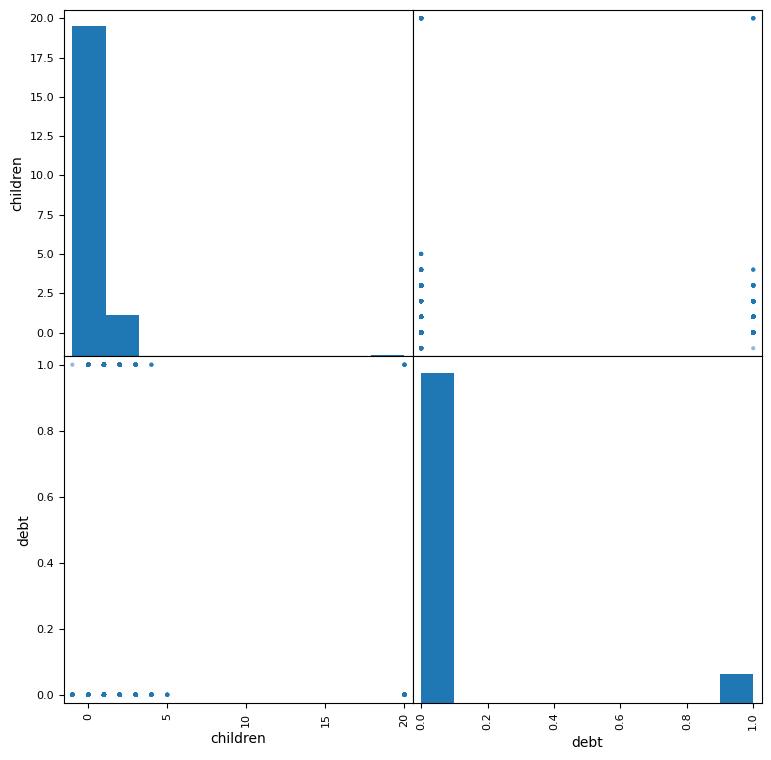

In [50]:
pd.plotting.scatter_matrix(data[['children','debt']], figsize=(9, 9));
plt.show()

In [54]:
data[['children','debt']].corr()

,children,debt
children,1.000000,0.018256
debt,0.018256,1.000000


Как видно, из коэффициента корелляции и графиков, нет зависимости между количеством детей и возвратом кредита в срок
Теперь исследуем влияние семейного статуса

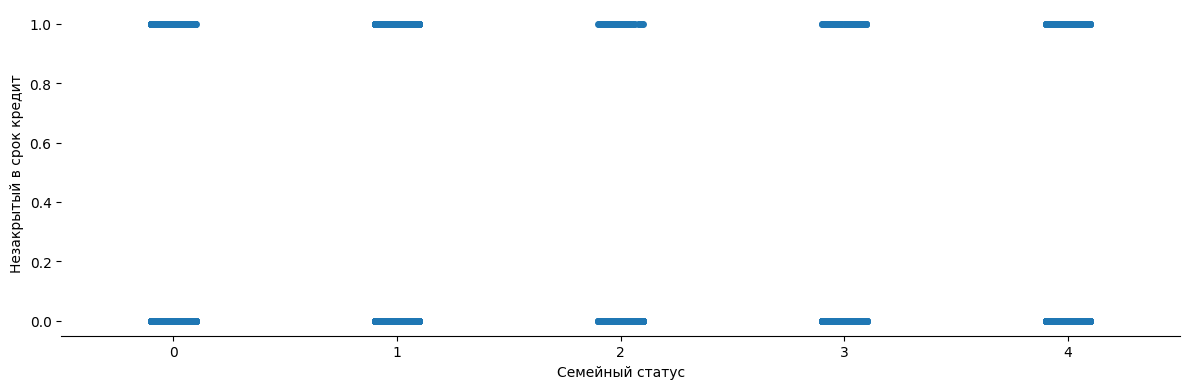

In [55]:
g = sns.catplot(x="family_status_id", y="debt", data = data, 
                height=4,
                aspect=3.0,
                order = family_status_df.family_status_id)
(g.set_axis_labels("Семейный статус", "Незакрытый в срок кредит").despine(left=True)) 

Как видно, зависимости опять не наблюдается,хотя график не информативен.

Теперь посмотрим на уровень доходов

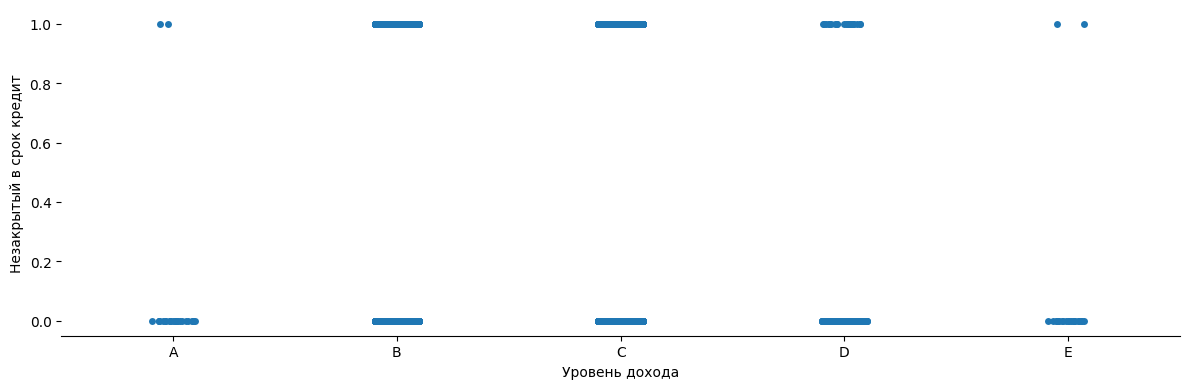

In [56]:
g = sns.catplot(x="total_income_category", y="debt", data = data, 
                height=4,
                aspect=3.0,
                order = ['A','B','C','D','E'])#data.total_income_category.unique()
(g.set_axis_labels("Уровень дохода", "Незакрытый в срок кредит").despine(left=True)) 

<AxesSubplot: xlabel='total_income', ylabel='debt'>

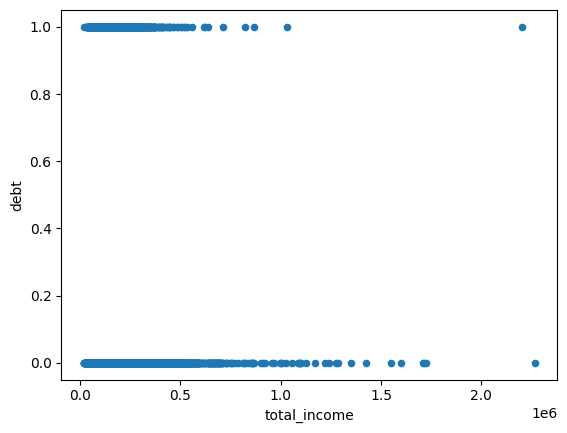

In [57]:
data.plot.scatter('total_income','debt')

Как видно, у людей с большими доходами почти нет незакрытых кредитов. Однако график не дает достаточно точную информацию. Посчитаем процент людей с незакрытыми кредитами в каждой категории доходов:

In [58]:
for cat in data.total_income_category.unique():
    print (cat)
    count = data[data.total_income_category== cat].shape[0]
    print ("Общее количество человек:",count)
    print("Процент невыплаченных кредитов: {:.0f}".format(data[(data.total_income_category==cat) & (data.debt==1)].shape[0]/count*100))

B
Общее количество человек: 5041
Процент невыплаченных кредитов: 7
C
Общее количество человек: 16016
Процент невыплаченных кредитов: 8
D
Общее количество человек: 350
Процент невыплаченных кредитов: 6
E
Общее количество человек: 22
Процент невыплаченных кредитов: 9
A
Общее количество человек: 25
Процент невыплаченных кредитов: 8


Получается небольшая зависимость есть, данные в категориях E ,D, A малочисленны, по наиболее крупным группам  и графику вывод - люди с высоким уровнем дохода чаще закрывают кредиты в срок

Последнее -цели кредита

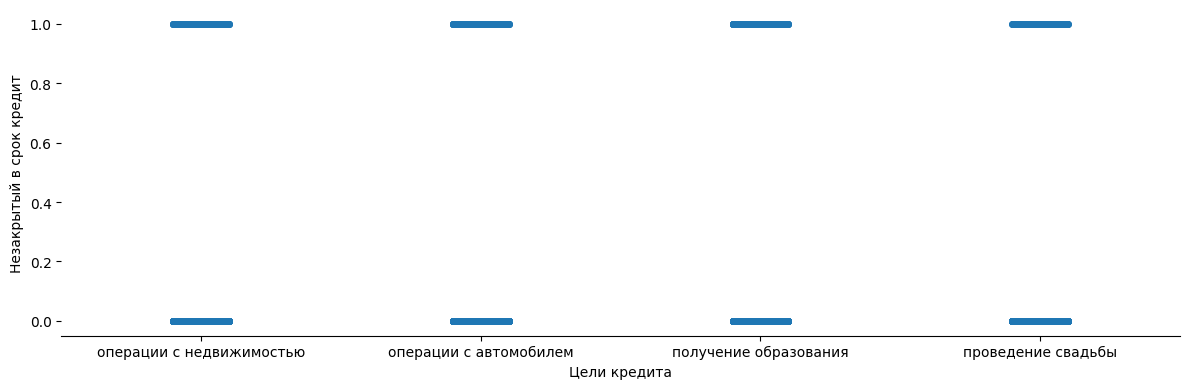

In [59]:
g = sns.catplot(x="purpose_category", y="debt", data = data, 
                height=4,
                aspect=3.0,
                order = data.purpose_category.unique())
(g.set_axis_labels("Цели кредита", "Незакрытый в срок кредит").despine(left=True)) 

In [60]:
for cat in data.purpose_category.unique():
    print (cat)
    count = data[data.purpose_category== cat].shape[0]
    print ("Общее количество человек:",count)
    print("Процент невыплаченных кредитов:",data[(data.purpose_category==cat) & (data.debt==1)].shape[0]/data[data.purpose_category==cat].shape[0]*100)

операции с недвижимостью
Общее количество человек: 10811
Процент невыплаченных кредитов: 7.233373415965221
операции с автомобилем
Общее количество человек: 4306
Процент невыплаченных кредитов: 9.359033906177427
получение образования
Общее количество человек: 4013
Процент невыплаченных кредитов: 9.22003488661849
проведение свадьбы
Общее количество человек: 2324
Процент невыплаченных кредитов: 8.00344234079174


Итак, кредиты на недвижимость закрываются лучше всего. Далее, проведение свадьбы, а вот кредиты на авто и образование закрываются несколько реже.

Подводя итоги, была проведена обработка таблицы с данными клиентов, полученная таблица удобна для последующего анализа данных.
Также был проведен частичный анализ данных, и выявлены факторы, влияющие на закрытие клиентом кредита, а именно уровень дохода и цели кредита.